In [ ]:
import pandas as pd
import psycopg2

# Connect to your PostgreSQL database
conn = psycopg2.connect(
    host="localhost",
    database="your_database_name",
    user="user_name",
    password="your_password"
)

# Write your SQL query
query = """
SELECT 
    ROUND(("Discount")::numeric, 2) AS discount_level, 
    ROUND(AVG("Profit")::numeric, 2) AS avg_profit
FROM orders_staging
GROUP BY
    discount_level
ORDER BY 
    discount_level;
"""

# Run query and load results into a DataFrame
df = pd.read_sql(query, conn)

# Save to CSV
df.to_csv(r"C:\Users\ochie\OneDrive\Desktop\D_Docs\superstore_performance_analysis\data\discount_profit.csv", index=False)

# Close connection
conn.close()

print("✅ Data exported successfully!")


✅ Data exported successfully!


C:\Users\ochie\AppData\Local\Temp\ipykernel_10624\2048778547.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv(r"C:\Users\ochie\OneDrive\Desktop\D_Docs\superstore_performance_analysis\data\discount_profit.csv", encoding="ISO-8859-1")

data.head()


,discount_level,avg_profit
0,0.00,66.90
1,0.10,96.06
2,0.15,27.29
3,0.20,24.70
4,0.30,-45.68


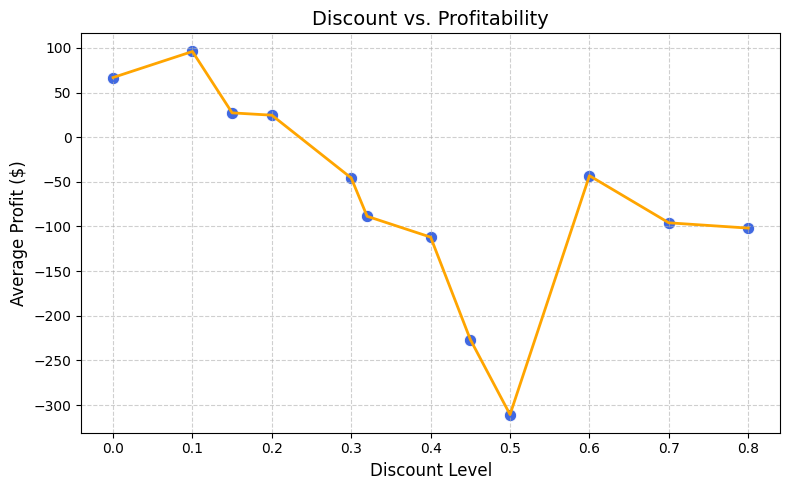

In [3]:
##scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='discount_level', y='avg_profit', color='royalblue', s=80)
sns.lineplot(data=data, x='discount_level', y='avg_profit', color='orange', linewidth=2)

plt.title("Discount vs. Profitability", fontsize=14)
plt.xlabel("Discount Level", fontsize=12)
plt.ylabel("Average Profit ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


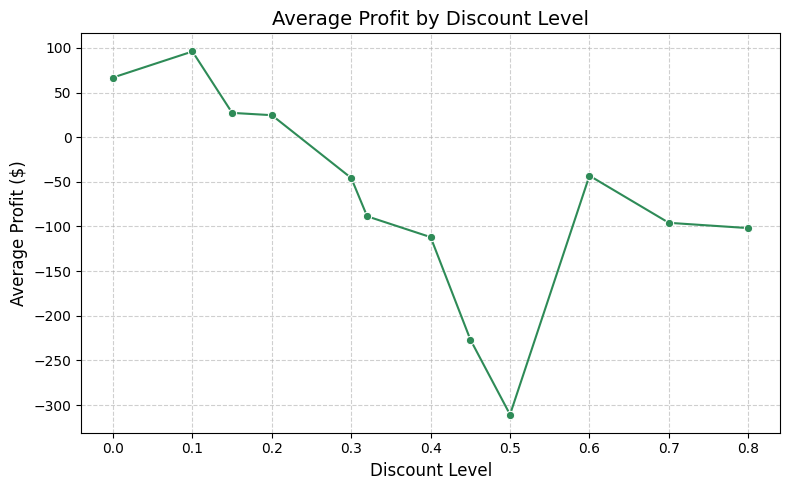

In [4]:
##line chart
plt.figure(figsize=(8,5))
sns.lineplot(data=data, x='discount_level', y='avg_profit', marker='o', color='seagreen')

plt.title("Average Profit by Discount Level", fontsize=14)
plt.xlabel("Discount Level", fontsize=12)
plt.ylabel("Average Profit ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [6]:
#relationship between discount and profit
corr = data['discount_level'].corr(data['avg_profit'])
print(f"Correlation between discount and profit: {corr:.2f}")


Correlation between discount and profit: -0.61
